In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#!pip install nltk

In [3]:
#!pip install wordcloud

In [4]:
#!pip install sklearn

In [5]:
#!pip install gensim

In [6]:
#!pip install spacy

In [2]:
data = pd.read_csv("The-Office-Lines-V2.csv")
data

season  episode   title  scene   speaker  \
0           1        1   Pilot      1   Michael   
1           1        1   Pilot      1       Jim   
2           1        1   Pilot      1   Michael   
3           1        1   Pilot      1       Jim   
4           1        1   Pilot      1   Michael   
...       ...      ...     ...    ...       ...   
54162       9       24  Finale   7972     Creed   
54163       9       24  Finale   7973  Meredith   
54164       9       24  Finale   7974   Phyllis   
54165       9       24  Finale   7975       Jim   
54166       9       24  Finale   7976       Pam   

                                                    line  
0      All right Jim. Your quarterlies look very good...  
1             Oh, I told you. I couldn't close it. So...  
2      So you've come to the master for guidance? Is ...  
3             Actually, you called me in here, but yeah.  
4        All right. Well, let me show you how it's done.  
...                                                  ...  
54162  It all seems so very arbitrary. I applied for ...  
54163  I just feel lucky that I got a chance to share...  
54164  I'm happy that this was all filmed so I can re...  
54165  I sold paper at this company for 12 years. My ...  
54166  I thought it was weird when you picked us to m...  

[54167 rows x 6 columns]

In [7]:
data.line.replace(np.nan,0, inplace=True)
data.dropna(subset=['line'], inplace=True)

In [8]:
data.replace(' ', np.nan, inplace=True)
data=data.dropna(how='any', axis=0)



In [303]:
data.line

0        All right Jim. Your quarterlies look very good...
1               Oh, I told you. I couldn't close it. So...
2        So you've come to the master for guidance? Is ...
3               Actually, you called me in here, but yeah.
4          All right. Well, let me show you how it's done.
                               ...                        
54162    It all seems so very arbitrary. I applied for ...
54163    I just feel lucky that I got a chance to share...
54164    I'm happy that this was all filmed so I can re...
54165    I sold paper at this company for 12 years. My ...
54166    I thought it was weird when you picked us to m...
Name: line, Length: 54162, dtype: object

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
data['clean_msg']= data['line'].apply(lambda x:remove_punctuation(x))
#data.clean_msg[]
data.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  
0  All right Jim Your quarterlies look very good ...  
1                Oh I told you I couldnt close it So  
2  So youve come to the master for guidance Is th...  
3            Actually you called me in here but yeah  
4        All right Well let me show you how its done

In [11]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

In [12]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  \
0  All right Jim Your quarterlies look very good ...   
1                Oh I told you I couldnt close it So   
2  So youve come to the master for guidance Is th...   
3            Actually you called me in here but yeah   
4        All right Well let me show you how its done   

                                           msg_lower  \
0  all right jim your quarterlies look very good ...   
1                oh i told you i couldnt close it so   
2  so youve come to the master for guidance is th...   
3            actually you called me in here but yeah   
4        all right well let me show you how its done   

                                        msg_tokenied  
0  [all right jim your quarterlies look very good...  
1              [oh i told you i couldnt close it so]  
2  [so youve come to the master for guidance is t...  
3          [actually you called me in here but yeah]  
4      [all right well let me show you how its done]

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [14]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [15]:
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))
data.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  \
0  All right Jim Your quarterlies look very good ...   
1                Oh I told you I couldnt close it So   
2  So youve come to the master for guidance Is th...   
3            Actually you called me in here but yeah   
4        All right Well let me show you how its done   

                                           msg_lower  \
0  all right jim your quarterlies look very good ...   
1                oh i told you i couldnt close it so   
2  so youve come to the master for guidance is th...   
3            actually you called me in here but yeah   
4        all right well let me show you how its done   

                                        msg_tokenied  \
0  [all right jim your quarterlies look very good...   
1              [oh i told you i couldnt close it so]   
2  [so youve come to the master for guidance is t...   
3          [actually you called me in here but yeah]   
4      [all right well let me show you how its done]   

                                        no_stopwords  
0  [all right jim your quarterlies look very good...  
1              [oh i told you i couldnt close it so]  
2  [so youve come to the master for guidance is t...  
3          [actually you called me in here but yeah]  
4      [all right well let me show you how its done]

In [16]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stems = [porter_stemmer.stem(word) for word in text]
    return stems
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))
data.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  \
0  All right Jim Your quarterlies look very good ...   
1                Oh I told you I couldnt close it So   
2  So youve come to the master for guidance Is th...   
3            Actually you called me in here but yeah   
4        All right Well let me show you how its done   

                                           msg_lower  \
0  all right jim your quarterlies look very good ...   
1                oh i told you i couldnt close it so   
2  so youve come to the master for guidance is th...   
3            actually you called me in here but yeah   
4        all right well let me show you how its done   

                                        msg_tokenied  \
0  [all right jim your quarterlies look very good...   
1              [oh i told you i couldnt close it so]   
2  [so youve come to the master for guidance is t...   
3          [actually you called me in here but yeah]   
4      [all right well let me show you how its done]   

                                        no_stopwords  \
0  [all right jim your quarterlies look very good...   
1              [oh i told you i couldnt close it so]   
2  [so youve come to the master for guidance is t...   
3          [actually you called me in here but yeah]   
4      [all right well let me show you how its done]   

                                         msg_stemmed  
0  [all right jim your quarterlies look very good...  
1              [oh i told you i couldnt close it so]  
2  [so youve come to the master for guidance is t...  
3          [actually you called me in here but yeah]  
4       [all right well let me show you how its don]

In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()


def lemmatizer(text):
    lemm = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  \
0  All right Jim Your quarterlies look very good ...   
1                Oh I told you I couldnt close it So   
2  So youve come to the master for guidance Is th...   
3            Actually you called me in here but yeah   
4        All right Well let me show you how its done   

                                           msg_lower  \
0  all right jim your quarterlies look very good ...   
1                oh i told you i couldnt close it so   
2  so youve come to the master for guidance is th...   
3            actually you called me in here but yeah   
4        all right well let me show you how its done   

                                        msg_tokenied  \
0  [all right jim your quarterlies look very good...   
1              [oh i told you i couldnt close it so]   
2  [so youve come to the master for guidance is t...   
3          [actually you called me in here but yeah]   
4      [all right well let me show you how its done]   

                                        no_stopwords  \
0  [all right jim your quarterlies look very good...   
1              [oh i told you i couldnt close it so]   
2  [so youve come to the master for guidance is t...   
3          [actually you called me in here but yeah]   
4      [all right well let me show you how its done]   

                                         msg_stemmed  \
0  [all right jim your quarterlies look very good...   
1              [oh i told you i couldnt close it so]   
2  [so youve come to the master for guidance is t...   
3          [actually you called me in here but yeah]   
4       [all right well let me show you how its don]   

                                      msg_lemmatized  
0  [all right jim your quarterlies look very good...  
1              [oh i told you i couldnt close it so]  
2  [so youve come to the master for guidance is t...  
3          [actually you called me in here but yeah]  
4      [all right well let me show you how its done]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(stop_words='english')
vectorizer.fit(data['msg_lower'])
vt=vectorizer.get_feature_names()
vt

/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '00983126',
 '0175',
 '019',
 '05',
 '050',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10001',
 '100k',
 '101',
 '1012',
 '102',
 '103',
 '1030',
 '105',
 '107',
 '107th',
 '109',
 '10am',
 '10s',
 '10th',
 '11',
 '1100th',
 '1115',
 '1120',
 '1123',
 '1130',
 '1138',
 '115',
 '117',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '1200000',
 '1201',
 '1220',
 '123',
 '1245',
 '125',
 '127',
 '128',
 '129',
 '1299',
 '12pack',
 '12th',
 '13',
 '132',
 '134',
 '13th',
 '14',
 '140',
 '142',
 '1434967',
 '147',
 '1490s',
 '15',
 '150',
 '1500',
 '150000',
 '156',
 '16',
 '160',
 '1600',
 '1600acre',
 '165',
 '16641',
 '16bond',
 '17',
 '1752',
 '17th',
 '18',
 '180',
 '18000',
 '1808',
 '1816',
 '185',
 '18505',
 '1864',
 '1865',
 '1866',
 '1890',
 '19',
 '190',
 '1930s',
 '1949',
 '1955',
 '1960s',
 '1967',
 '1970s',
 '1972',
 '1980',
 '1980s',
 '1982',
 '1983',
 '1985',
 '199',
 '1992',
 '1995',
 '1996',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '20000',
 '2001',
 '200

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(stop_words='english')
tfvectorizer.fit(data['msg_lower'])
tfvectorizer.vocabulary_

{'right': 15080,
 'jim': 9699,
 'quarterlies': 14273,
 'look': 10648,
 'good': 7736,
 'things': 18138,
 'library': 10424,
 'oh': 12437,
 'told': 18385,
 'close': 3644,
 'youve': 20363,
 'come': 3825,
 'master': 11039,
 'guidance': 8023,
 'youre': 20353,
 'saying': 15570,
 'grasshopper': 7864,
 'actually': 505,
 'called': 2850,
 'yeah': 20258,
 'let': 10386,
 'yes': 20303,
 'id': 8942,
 'like': 10471,
 'speak': 16834,
 'office': 12420,
 'manager': 10902,
 'hello': 8436,
 'michael': 11324,
 'scott': 15675,
 'regional': 14692,
 'dunder': 5791,
 'mifflin': 11371,
 'paper': 12917,
 'products': 14001,
 'just': 9841,
 'wanted': 19562,
 'talk': 17796,
 'manageramanger': 10903,
 'deal': 4825,
 'thank': 18054,
 'sir': 16305,
 'gentleman': 7557,
 'scholar': 15625,
 'im': 9000,
 'sorry': 16758,
 'ok': 12469,
 'mistake': 11511,
 'woman': 20046,
 'talking': 17800,
 'low': 10715,
 'voice': 19441,
 'probably': 13973,
 'smoker': 16548,
 'thats': 18075,
 'way': 19654,
 'ive': 9571,
 'uh': 18852,
 '12': 

In [20]:
def vectorization(msg_lower):
    corpus = [tokenize(doc) for doc in msg_lower]
    texts  = TextCollection(corpus)

    for doc in corpus:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc
        }

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
corpus = tfidf.fit_transform(data.msg_lower)
corpus

<54162x20722 sparse matrix of type '<class 'numpy.float64'>'
	with 477658 stored elements in Compressed Sparse Row format>

## Using Glove

In [56]:
def get_non_glove_words(dataframe, column, model):
    # Unique Words
    counts = dataframe[column].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
    # Extracting Glove Words and Non Glove Words
    non_glove_words = []
    glove_words = []
    for i in counts['unique_words']:
        try:
            model.get_vector(i)
        except KeyError:
            non_glove_words.append(i)
        else:
            glove_words.append(i)
    #Non-Glove words
    non_glove_words_df = pd.DataFrame({'unique_non_glove_words':non_glove_words})
    non_glove_words_df = pd.merge(non_glove_words_df,counts,how='left',left_on=['unique_non_glove_words'],right_on=['unique_words']).iloc[:,[0,2]]
    non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(),2)
    print('Done')
    return(non_glove_words_df)

In [57]:
from gensim.models import KeyedVectors
filename = 'glove.6B.100d.txt'
model = KeyedVectors.load_word2vec_format(filename , binary=False)
    
non_glove_words_df = get_non_glove_words(data, column = 'msg_lower', model = model)
print(len(non_glove_words_df))

Done
7513


In [58]:
import sys
def extract_vectors(dataframe, column, method, non_glove_words_df, n=3):
    if method=="first_n_words":
        #Approach: First n words
        #Add 'blank' to words less than n
        dataframe['Length_Glove_Words'] = dataframe[column].str.split().str.len()
        def blank_words (row, n):
            for i in range(1,n+1) :
                if row['Length_Glove_Words'] == i :
                    return ' blank' * (n-i)
        dataframe['Words'] = dataframe.apply(lambda row: blank_words(row,n),axis=1)
        dataframe['Top_Words'] = dataframe[column].fillna('') + dataframe['Words'].fillna('')
        dataframe.drop(['Length_Glove_Words','Words'], axis=1, inplace=True)
        #Select First n Words
        dataframe['Top_Words'] = dataframe['Top_Words'].str.split().str[0:n].str.join(' ')
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        #Add Glove embeddings
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Glove vectors for top 3 words        
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            df = []
            for i in range(0,n):
                df = np.append(df,unique_word_vec[row.Top_Words.split(' ')[i]])            
            #df = np.append(df,unique_word_vec[row.Top_Words])
            stack.extend(np.vstack(df).T)
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1
        del unique_word_vec
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[["Top_Words"]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    elif method == "sum_word_vectors":        
        #Approach: Sum of d word vectors for n words
        #Add Glove embeddings
        dataframe['Top_Words'] = dataframe[column].str.split().str.join(' ')
        #Select First n Words
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Sum of Glove vectors for n words
        from operator import add
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            sum_word_vec = [0]*100
            for word in row['Top_Words'].split(' '):
                word_vec = unique_word_vec[word]
                sum_word_vec = list(map(add, sum_word_vec, word_vec))
            stack.extend([sum_word_vec])
            if j==length:
               print('\rProgress:  100%', end='')
               sys.stdout.flush()
            elif j%100==0:
               print('\rProgress: %d' % j, end='')
               sys.stdout.flush()
            j+=1
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[['Top_Words']]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    

In [ ]:
cluster_dataset = extract_vectors(data,column='msg_lower',method='first_n_words', non_glove_words_df = non_glove_words_df, n=3)  

In [59]:
cluster_data = extract_vectors(data,column='msg_lower',method='sum_word_vectors', non_glove_words_df = non_glove_words_df)

/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


       season  episode   title  scene  speaker  \
32          1        1   Pilot     10  Michael   
44          1        1   Pilot     10  Michael   
54          1        1   Pilot     11      Jan   
70          1        1   Pilot     15      Jim   
76          1        1   Pilot     17      Pam   
...       ...      ...     ...    ...      ...   
54140       9       24  Finale   7961    Kevin   
54150       9       24  Finale   7967    Creed   
54151       9       24  Finale   7967   Angela   
54152       9       24  Finale   7967    Creed   
54153       9       24  Finale   7968    Kevin   

                                           line  \
32                   Um... Me no get an agenda.   
44                                        OK...   
54                                    Go ahead.   
70                                         Yes?   
76                           This is Mr. Scott.   
...                                         ...   
54140                                  Oh,

In [61]:
cluster_data

Top_Words         0         1         2  \
0                     um me no get an agenda -1.084628  0.692580  3.663260   
1                                         ok  0.212950  0.037070  1.012400   
2                                   go ahead -0.356134  0.353860  1.334200   
3                                        yes -0.050131  0.663560  0.843150   
4                           this is mr scott -1.962430  0.477857  1.539850   
...                                      ...       ...       ...       ...   
8310                                  oh yes -0.716781  1.096250  2.156550   
8311         i still have my medal from that  0.849377  3.307820  2.681925   
8312             do you even have a mattress -1.341380  2.722386  1.723067   
8313  no but i still have my medal from that  0.778532  4.039030  3.969485   
8314              oscar oscar i think im gay  3.183017  2.278560  1.003979   

             3         4         5         6         7         8  ...  \
0    -2.749717 -1.996200  0.725717  0.184280  1.419600  1.930173  ...   
1    -0.674930 -0.881750  0.183730  0.000438  0.600140  0.417200  ...   
2    -1.118290 -0.121618  0.063110 -0.307916  0.486832 -0.804154  ...   
3    -0.752950 -0.428480  0.161000 -0.036730  0.074777  0.352510  ...   
4    -1.732470 -0.157871 -0.560460  0.325199  1.108870 -1.227475  ...   
...        ...       ...       ...       ...       ...       ...  ...   
8310 -1.576960 -0.919670 -0.094390  0.135450  0.171268  1.087220  ...   
8311 -2.924100 -1.830550  0.613169 -0.818724  1.887000 -1.177245  ...   
8312 -2.766416 -2.070130  1.878490 -0.633456  1.815110  0.378480  ...   
8313 -4.121220 -2.848390  0.937259 -0.773154  2.200758 -0.088465  ...   
8314 -2.849040 -1.214837  0.139610 -0.912041 -0.277055 -0.045400  ...   

            90        91        92        93        94        95        96  \
0     0.691958 -0.031347  0.780098  0.083561 -1.520590 -1.093506 -1.228430   
1     0.181270 -0.040203 -0.031254 -0.011978 -0.093409  0.025642  0.027521   
2    -0.571610 -0.007430 -0.340590  0.168760 -1.477320 -0.351513  0.855650   
3    -0.042350 -0.334790  0.243310  0.576450 -0.497790  0.072397 -0.263010   
4    -0.790515 -0.959530  0.070390  1.242065  0.572976  0.490070 -0.309689   
...        ...       ...       ...       ...       ...       ...       ...   
8310 -0.151510 -0.499120  0.156946  1.390250 -0.824960 -0.201763 -0.186805   
8311 -1.392756 -0.956558  0.677409  1.542296 -4.232150 -0.213585 -2.864080   
8312  0.369370 -1.069458  0.045360 -1.866313 -2.581865 -0.423666 -0.564240   
8313 -1.312089 -2.105858  0.314408  1.981878 -5.552720  0.067599 -3.705060   
8314  0.387880 -1.244840  2.525175  2.531864 -0.988458  1.740820 -0.499560   

            97        98        99  
0    -1.736606  3.262369  2.213180  
1    -0.262160 -0.069477 -0.070536  
2     0.910810  1.088850  0.447620  
3     0.164890  0.048798  0.503590  
4    -2.273769  0.342010 -0.250350  
...        ...       ...       ...  
8310 -1.230910 -0.194902  0.368850  
8311 -2.355420  2.471868  2.817720  
8312 -2.093001  2.760690  2.544910  
8313 -3.223270  2.956212  3.400290  
8314 -0.364550 -0.198633  3.152010  

[8315 rows x 101 columns]

In [121]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [63]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(cluster_data.iloc[:, 1:])
#del cluster_dataset

In [64]:
wcss = []
for i in range(1, 52, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 51

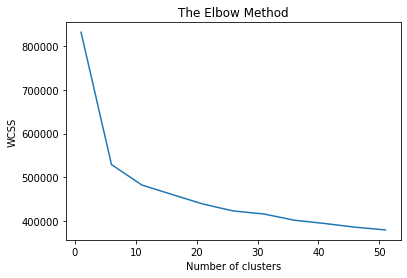

In [65]:
plt.plot(range(1, 52, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)



0
1


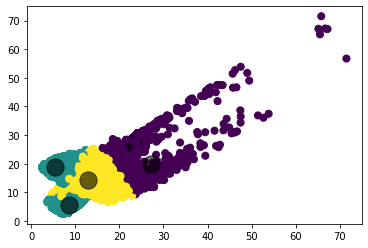

In [67]:
for i in range(0,2) :
    print(i)
    x=y_kmeans[: ,i]
    y= y_kmeans[: ,i+1]
    plt.scatter(x, y,c=prediction,s=50 , cmap='viridis')

    centers2 = fitted.cluster_centers_
    plt.scatter(centers2[:, i], centers2[:, i+1],c='black', s=300, alpha=0.6)


In [111]:
g = sns.PairGrid(int (y_kmeans))
g.map(sns.scatterplot)

TypeError: only size-1 arrays can be converted to Python scalars

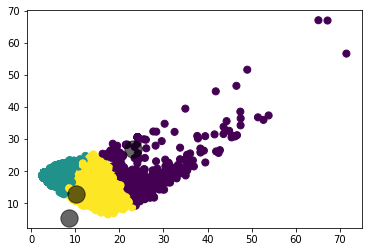

In [53]:
for i in y_kmeans:
    i == 1
    x = y_kmeans[:, 1]
    y = y_kmeans[:, 2]
    
plt.scatter(x, y,c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


In [ ]:
or i in y_kmeans:
    i == 2
    x = y_kmeans[:, 2]
    y = y_kmeans[:, 1]
    
plt.scatter(x, y,c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)


In [45]:
X = cluster_data[["y_kmeans[:, 0]","y_kmeans[:, 1]"]]
plt.scatter(X["y_kmeans[:, 1]"],X["y_kmeans[:, 0]"],c='black')

plt.show()


KeyError: "None of [Index(['y_kmeans[:, 0]', 'y_kmeans[:, 1]'], dtype='object')] are in the [columns]"

In [40]:
X = ["y_kmeans[:, 0]" , "y_kmeans[:, 1]"]
# Select random observation as centroids
K=3
Centroids = (X.k)
plt.scatter(X["y_kmeans[:, 0]"],X["y_kmeans[:, 1]"],c='black')
#plt.scatter(Centroids["y_kmeans[:, 0]"],Centroids["y_kmeans[:, 1]"],c='red')
plt.xlabel('y_kmeans[:, 0]')
plt.ylabel('y_kmeans[:, 1]')
plt.show()

AttributeError: 'list' object has no attribute 'k'

## PCA

In [ ]:
y_kmeans.shape

In [68]:
cluster_data['CLUSTERS'] = kmeans.labels_
cluster_data.to_csv("cluster_sum_glove_vectors.csv",index=False)

In [69]:
cluster_data = cluster_data[['Top_Words', 'CLUSTERS']]
cluster_data

Top_Words  CLUSTERS
0                     um me no get an agenda         2
1                                         ok         1
2                                   go ahead         1
3                                        yes         1
4                           this is mr scott         1
...                                      ...       ...
8310                                  oh yes         1
8311         i still have my medal from that         2
8312             do you even have a mattress         2
8313  no but i still have my medal from that         2
8314              oscar oscar i think im gay         2

[8315 rows x 2 columns]

In [70]:
cluster_data.to_csv("cluster_sum_glove_vectors.csv",index=False)

In [71]:
cluster_data.sort_values('CLUSTERS')

Top_Words  CLUSTERS
7297           pam we need to get to the bottom of this         0
1365  love me say that you love me fool me fool me g...         0
7867                i resent that i i never lied to you         0
4873  do you want me to spin you in your chair and m...         0
4868          no uh the movie did you see the movie saw         0
...                                                 ...       ...
8313             no but i still have my medal from that         2
4158                                        i can do it         2
4159                                      three two one         2
4117                             ok i love it i love it         2
8314                         oscar oscar i think im gay         2

[8315 rows x 2 columns]

In [72]:
cluster_data[cluster_data['CLUSTERS'] == 0].head(10)

Top_Words  CLUSTERS
59     its a great plan it saves the company a fortune         0
70   yes i can im manager for the day clean out you...         0
126  i will use your talents come baseball season m...         0
133  no i am the team manager you can be assistant ...         0
139              um i think im gonna be up at the lake         0
178  oh definitely definitely step in and out of it...         0
223    mine are at home in a display case above my bed         0
263  forward it like its hot forward it like its ho...         0
293                  no no no no that crosses the line         0
297          i got your sausage egg and cheese biscuit         0

In [73]:
cluster_data[cluster_data['CLUSTERS'] == 1].head(10)

Top_Words  CLUSTERS
1                 ok         1
2           go ahead         1
3                yes         1
4   this is mr scott         1
8           go ahead         1
9   not gonna happen         1
12                no         1
13       damn it jim         1
16   are you serious         1
17                is         1

In [74]:
cluster_data[cluster_data['CLUSTERS'] == 2].head(10)

Top_Words  CLUSTERS
0                     um me no get an agenda         2
5                   guilty guilty as charged         2
6                       its not on your desk         2
7          assistant to the regional manager         2
10                      can you promise that         2
11                      on his mothers grave         2
14  do i think ill be invited to the wedding         2
15                             you got a fax         2
20                      yes i do you want to         2
21                   retaliation tit for tit         2

In [75]:
cluster_data[cluster_data['CLUSTERS'] == 3].head(10)

Empty DataFrame
Columns: [Top_Words, CLUSTERS]
Index: []

In [76]:
cluster_data[cluster_data['CLUSTERS'] == 4].head(10)

Empty DataFrame
Columns: [Top_Words, CLUSTERS]
Index: []

In [77]:
cluster_data[cluster_data['CLUSTERS'] == 5].head(10)

Empty DataFrame
Columns: [Top_Words, CLUSTERS]
Index: []

In [78]:
cluster_data[cluster_data['CLUSTERS'] == 6].head(10)

Empty DataFrame
Columns: [Top_Words, CLUSTERS]
Index: []

In [79]:
cluster_data[cluster_data['CLUSTERS'] == 7].head(10)

Empty DataFrame
Columns: [Top_Words, CLUSTERS]
Index: []

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==0].Top_Words.values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==1].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Grey").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==2].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Black").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()


In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==3].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="red").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==4].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Yellow").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==5].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Pink").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==6].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Blue").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
word="".join(line for line in (cluster_data[cluster_data['CLUSTERS']==7].Top_Words.values))
WC = WordCloud(max_font_size=50, background_color="Purple").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [ ]:
sns.countplot(cluster_data['CLUSTERS'])

In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==0].Top_Words).split()
top_words


In [ ]:
count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)



In [ ]:
from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])

In [ ]:
sns.barplot(list(TW.keys()), list(TW.values()))

In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==1].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==2].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==3].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==4].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==5].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==6].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
top_words=[]
top_words= " ".join(cluster_data[cluster_data['CLUSTERS']==7].Top_Words).split()

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

top_words=remove_stopwords(top_words)

from operator import itemgetter
TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(TW.keys()), list(TW.values()))


In [ ]:
cluster_data[cluster_data['CLUSTERS']==0].value_counts().iloc[:15].plot(kind='bar') 

In [ ]:
tfvectorizer = TfidfVectorizer()
X = tfvectorizer.fit_transform(data['msg_lower'][:300])
tf_idf = pd.DataFrame(data = X.toarray(), columns=tfvectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

In [ ]:
final_df

## Using FastText

In [60]:
#!python3 -m spacy download en_core_web_sm

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")
texts=[]
for document in data.msg_lower[:100]:
    text=[]
    doc=nlp(str(data.msg_lower))
    for w in doc:
        if not w.is_stop and not w.like_num:
            text.append(w.lemma_)
            texts.append(text)
print(texts[:50])

[['       ', 'right', 'jim', 'quarterly', 'look', 'good', '...', '\n', '                     ', 'oh', 'tell', 'not', 'close', '\n', '       ', 've', 'come', 'master', 'guidance', 'th', '...', '\n', '                 ', 'actually', 'call', 'yeah', '\n', '             ', 'right', 'let', '\n                               ', '...', '                       \n', '   ', 'arbitrary', 'apply', '...', '\n', '   ', 'feel', 'lucky', 'get', 'chance', 'share', '...', '\n', '   ', 'm', 'happy', 'film', 'rem', '...', '\n', '   ', 'sell', 'paper', 'company', 'year', 'j', '...', '\n', '   ', 'think', 'weird', 'pick', 'm', '...', '\n', ':', 'msg_lower', ',', 'Length', ':', ',', 'dtype', ':', 'object'], ['       ', 'right', 'jim', 'quarterly', 'look', 'good', '...', '\n', '                     ', 'oh', 'tell', 'not', 'close', '\n', '       ', 've', 'come', 'master', 'guidance', 'th', '...', '\n', '                 ', 'actually', 'call', 'yeah', '\n', '             ', 'right', 'let', '\n                   

In [25]:
import fasttext
import fasttext.util
data[['msg_lower']].to_csv('MSL.csv', index=False)

In [29]:
model=fasttext.train_unsupervised('MSL.csv')
model.words



Read 0M words
Number of words:  5313
Number of labels: 0
Progress: 100.0% words/sec/thread:  141328 lr:  0.000000 avg.loss:  2.532697 ETA:   0h 0m 0s


['</s>',
 'i',
 'you',
 'the',
 'to',
 'a',
 'and',
 'it',
 'that',
 'is',
 'of',
 'no',
 'this',
 'in',
 'what',
 'me',
 'my',
 'have',
 'im',
 'just',
 'we',
 'its',
 'know',
 'so',
 'do',
 'for',
 'not',
 'oh',
 'on',
 'dont',
 'are',
 'be',
 'was',
 'your',
 'like',
 'yeah',
 'all',
 'with',
 'okay',
 'but',
 'well',
 'right',
 'get',
 'here',
 'about',
 'thats',
 'hey',
 'can',
 'go',
 'he',
 'out',
 'think',
 'good',
 'youre',
 'up',
 'at',
 'michael',
 'if',
 'one',
 'going',
 'really',
 'were',
 'want',
 'how',
 'there',
 'yes',
 'would',
 'did',
 'ok',
 'now',
 'gonna',
 'uh',
 'come',
 'dwight',
 'they',
 'got',
 'will',
 'an',
 'am',
 'her',
 'why',
 'see',
 'or',
 'jim',
 'time',
 'from',
 'some',
 'back',
 'him',
 'who',
 'because',
 'she',
 'say',
 'as',
 'need',
 'pam',
 'when',
 'could',
 'great',
 'thank',
 'cant',
 'look',
 'guys',
 'very',
 'people',
 'um',
 'then',
 'take',
 'been',
 'should',
 'little',
 'hes',
 'make',
 'our',
 'lets',
 'mean',
 'tell',
 'us',
 'h

In [30]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

MW=remove_stopwords(model.words)

In [31]:
ft_vec=[model.get_word_vector(x) for x in MW]

In [32]:
MW

['</s>',
 'im',
 'know',
 'oh',
 'dont',
 'like',
 'yeah',
 'okay',
 'well',
 'right',
 'get',
 'thats',
 'hey',
 'go',
 'think',
 'good',
 'youre',
 'michael',
 'one',
 'going',
 'really',
 'want',
 'yes',
 'would',
 'ok',
 'gonna',
 'uh',
 'come',
 'dwight',
 'got',
 'see',
 'jim',
 'time',
 'back',
 'say',
 'need',
 'pam',
 'could',
 'great',
 'thank',
 'cant',
 'look',
 'guys',
 'people',
 'um',
 'take',
 'little',
 'hes',
 'make',
 'lets',
 'mean',
 'tell',
 'us',
 'sorry',
 'way',
 'god',
 'ill',
 'man',
 'thing',
 'something',
 'didnt',
 'day',
 'work',
 'love',
 'two',
 'please',
 'andy',
 'whats',
 'office',
 'much',
 'said',
 'let',
 'ive',
 'maybe',
 'call',
 'never',
 'theres',
 'alright',
 'new',
 'wait',
 'talk',
 'sure',
 'give',
 'nice',
 'actually',
 'even',
 'stop',
 'lot',
 'thought',
 'put',
 'guy',
 'wow',
 'today',
 'shes',
 'big',
 'first',
 'ever',
 'things',
 'job',
 'anything',
 'feel',
 'hi',
 'everyone',
 'thanks',
 'fine',
 'everybody',
 'party',
 'three',


In [33]:
ft_vec

[array([-1.02983661e-01,  4.10631984e-01, -2.43541047e-01, -7.06285536e-02,
         3.59180748e-01, -8.40286538e-02, -2.03778714e-01, -1.04854830e-01,
         1.93731233e-01,  2.88631082e-01, -2.45512347e-04,  1.83895454e-01,
         2.02474475e-01,  1.07945994e-01,  3.79408635e-02,  1.09982109e-02,
        -2.65445918e-01,  1.36382999e-02,  3.10914107e-02, -7.81869218e-02,
        -3.28273028e-02,  4.32251580e-02,  4.25109938e-02, -7.52947703e-02,
         8.27559456e-02, -8.22886731e-03, -1.08095355e-01, -1.49768651e-01,
         3.31347249e-02,  1.54695243e-01, -1.84611425e-01,  1.84622094e-01,
        -1.06323108e-01, -5.97800314e-02, -9.72780883e-02, -2.63342828e-01,
        -5.38280308e-02, -2.65877187e-01, -3.98397714e-01,  1.07281797e-01,
        -6.38156533e-02,  1.10910818e-01,  1.31015731e-02,  1.01416469e-01,
         1.03662588e-01, -2.21926764e-01, -1.77549556e-01, -2.56696284e-01,
        -2.49822944e-01,  2.37447634e-01, -4.09403503e-01,  4.11671638e-01,
        -4.1

In [34]:
def fasttext_word_vec():
    ft_dict={}
    for word in MW:
            ft_dict[word]=model.get_word_vector(word)
    return ft_dict
fasttext_word_vec()



{'</s>': array([-1.02983661e-01,  4.10631984e-01, -2.43541047e-01, -7.06285536e-02,
         3.59180748e-01, -8.40286538e-02, -2.03778714e-01, -1.04854830e-01,
         1.93731233e-01,  2.88631082e-01, -2.45512347e-04,  1.83895454e-01,
         2.02474475e-01,  1.07945994e-01,  3.79408635e-02,  1.09982109e-02,
        -2.65445918e-01,  1.36382999e-02,  3.10914107e-02, -7.81869218e-02,
        -3.28273028e-02,  4.32251580e-02,  4.25109938e-02, -7.52947703e-02,
         8.27559456e-02, -8.22886731e-03, -1.08095355e-01, -1.49768651e-01,
         3.31347249e-02,  1.54695243e-01, -1.84611425e-01,  1.84622094e-01,
        -1.06323108e-01, -5.97800314e-02, -9.72780883e-02, -2.63342828e-01,
        -5.38280308e-02, -2.65877187e-01, -3.98397714e-01,  1.07281797e-01,
        -6.38156533e-02,  1.10910818e-01,  1.31015731e-02,  1.01416469e-01,
         1.03662588e-01, -2.21926764e-01, -1.77549556e-01, -2.56696284e-01,
        -2.49822944e-01,  2.37447634e-01, -4.09403503e-01,  4.11671638e-01,
    

In [35]:
M_S = pd.DataFrame(fasttext_word_vec().items(), columns = ('words', 'vectors'))
M_S

words                                            vectors
0         </s>  [-0.10298366, 0.41063198, -0.24354105, -0.0706...
1           im  [0.18002431, 0.88106, -0.1816668, -0.1760014, ...
2         know  [0.24850814, 0.34735402, 0.033903528, 0.043367...
3           oh  [0.1869006, 0.4352901, -0.25783914, 0.10621835...
4         dont  [0.2050216, 0.16980389, -0.17821583, 0.0301759...
...        ...                                                ...
5177    doobie  [0.15511274, 0.20258065, -0.09482724, -0.08857...
5178       pep  [0.12509826, 0.32006258, -0.08028358, -0.10601...
5179  pretzels  [0.19015247, 0.28352314, -0.07246037, -0.10143...
5180   flashed  [0.20108116, 0.15613951, -0.09045643, -0.07751...
5181  ceilings  [0.14083694, 0.33344012, -0.046088006, -0.0979...

[5182 rows x 2 columns]

In [43]:
split_MS = pd.DataFrame(M_S['vectors'].to_list())
split_MS

0         1         2         3         4         5         6   \
0    -0.102984  0.410632 -0.243541 -0.070629  0.359181 -0.084029 -0.203779   
1     0.180024  0.881060 -0.181667 -0.176001  0.546656  0.095520 -0.490069   
2     0.248508  0.347354  0.033904  0.043367  0.233205 -0.054960 -0.104069   
3     0.186901  0.435290 -0.257839  0.106218  0.097101 -0.106146 -0.026657   
4     0.205022  0.169804 -0.178216  0.030176  0.320923 -0.122198 -0.129551   
...        ...       ...       ...       ...       ...       ...       ...   
5177  0.155113  0.202581 -0.094827 -0.088577  0.136061 -0.081328 -0.230013   
5178  0.125098  0.320063 -0.080284 -0.106012  0.145511 -0.017213 -0.307196   
5179  0.190152  0.283523 -0.072460 -0.101431  0.203903 -0.061259 -0.330904   
5180  0.201081  0.156140 -0.090456 -0.077514  0.099974 -0.062898 -0.173169   
5181  0.140837  0.333440 -0.046088 -0.097918  0.279149  0.044359 -0.352067   

            7         8         9   ...        90        91        92  \
0    -0.104855  0.193731  0.288631  ...  0.359769  0.023020  0.267771   
1    -0.191506 -0.154229  0.297632  ...  0.105746  0.193151  0.457980   
2    -0.331716  0.019854  0.185175  ...  0.202060  0.082147  0.199699   
3     0.133455  0.216293  0.153787  ...  0.692970 -0.095854  0.396822   
4    -0.432741  0.034121  0.191212  ...  0.437787  0.156003  0.290102   
...        ...       ...       ...  ...       ...       ...       ...   
5177 -0.104619  0.044137  0.090057  ...  0.392604 -0.047196  0.275863   
5178 -0.114719  0.049542  0.139774  ...  0.340881 -0.087193  0.238637   
5179 -0.220364 -0.047308  0.178537  ...  0.208261 -0.007553  0.205563   
5180 -0.012992 -0.043906  0.128458  ...  0.135209  0.008152  0.376718   
5181 -0.256138  0.069404  0.161078  ...  0.273400  0.110633  0.143943   

            93        94        95        96        97        98        99  
0    -0.043048  0.055490 -0.108000  0.065981  0.314431 -0.291278 -0.259632  
1    -0.071010 -0.066000  0.049745 -0.005159  0.213520 -0.226250 -0.194783  
2     0.046087 -0.117549  0.145958  0.132851  0.318692 -0.003821 -0.271185  
3     0.116006  0.099751 -0.233169 -0.126381  0.340398 -0.299978 -0.491242  
4     0.212342  0.039069  0.206889  0.019393  0.442765  0.005874 -0.217755  
...        ...       ...       ...       ...       ...       ...       ...  
5177 -0.046167  0.037472 -0.126472 -0.048979  0.114494 -0.230514 -0.211424  
5178 -0.081941 -0.039012 -0.045273  0.079029  0.095009 -0.159318 -0.249477  
5179 -0.052999 -0.061109 -0.029748  0.065132  0.041417 -0.121259 -0.185244  
5180  0.046275  0.101636 -0.235542 -0.042931  0.123691 -0.187923 -0.103293  
5181 -0.029282 -0.102778 -0.087308  0.005878  0.071263 -0.128418 -0.254708  

[5182 rows x 100 columns]

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sys

In [48]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(split_MS.iloc[:, 1:])

In [49]:
wcss = []
for i in range(1, 55, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(split_MS)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 51

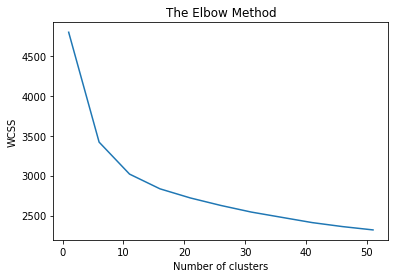

In [50]:
plt.plot(range(1, 55, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)


0
1
2
3


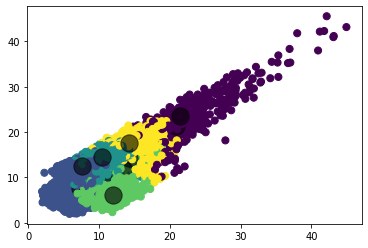

In [52]:
for i in range(0,4) :
    print(i)
    x=y_kmeans[: ,i]
    y= y_kmeans[: ,i+1]
    plt.scatter(x, y,c=prediction,s=50 , cmap='viridis')

    centers2 = fitted.cluster_centers_
    plt.scatter(centers2[:, i], centers2[:, i+1],c='black', s=300, alpha=0.6)


In [53]:
words = M_S["words"]

In [54]:
split_MS = split_MS.join(words)
split_MS

0         1         2         3         4         5         6  \
0    -0.102984  0.410632 -0.243541 -0.070629  0.359181 -0.084029 -0.203779   
1     0.180024  0.881060 -0.181667 -0.176001  0.546656  0.095520 -0.490069   
2     0.248508  0.347354  0.033904  0.043367  0.233205 -0.054960 -0.104069   
3     0.186901  0.435290 -0.257839  0.106218  0.097101 -0.106146 -0.026657   
4     0.205022  0.169804 -0.178216  0.030176  0.320923 -0.122198 -0.129551   
...        ...       ...       ...       ...       ...       ...       ...   
5177  0.155113  0.202581 -0.094827 -0.088577  0.136061 -0.081328 -0.230013   
5178  0.125098  0.320063 -0.080284 -0.106012  0.145511 -0.017213 -0.307196   
5179  0.190152  0.283523 -0.072460 -0.101431  0.203903 -0.061259 -0.330904   
5180  0.201081  0.156140 -0.090456 -0.077514  0.099974 -0.062898 -0.173169   
5181  0.140837  0.333440 -0.046088 -0.097918  0.279149  0.044359 -0.352067   

             7         8         9  ...        91        92        93  \
0    -0.104855  0.193731  0.288631  ...  0.023020  0.267771 -0.043048   
1    -0.191506 -0.154229  0.297632  ...  0.193151  0.457980 -0.071010   
2    -0.331716  0.019854  0.185175  ...  0.082147  0.199699  0.046087   
3     0.133455  0.216293  0.153787  ... -0.095854  0.396822  0.116006   
4    -0.432741  0.034121  0.191212  ...  0.156003  0.290102  0.212342   
...        ...       ...       ...  ...       ...       ...       ...   
5177 -0.104619  0.044137  0.090057  ... -0.047196  0.275863 -0.046167   
5178 -0.114719  0.049542  0.139774  ... -0.087193  0.238637 -0.081941   
5179 -0.220364 -0.047308  0.178537  ... -0.007553  0.205563 -0.052999   
5180 -0.012992 -0.043906  0.128458  ...  0.008152  0.376718  0.046275   
5181 -0.256138  0.069404  0.161078  ...  0.110633  0.143943 -0.029282   

            94        95        96        97        98        99     words  
0     0.055490 -0.108000  0.065981  0.314431 -0.291278 -0.259632      </s>  
1    -0.066000  0.049745 -0.005159  0.213520 -0.226250 -0.194783        im  
2    -0.117549  0.145958  0.132851  0.318692 -0.003821 -0.271185      know  
3     0.099751 -0.233169 -0.126381  0.340398 -0.299978 -0.491242        oh  
4     0.039069  0.206889  0.019393  0.442765  0.005874 -0.217755      dont  
...        ...       ...       ...       ...       ...       ...       ...  
5177  0.037472 -0.126472 -0.048979  0.114494 -0.230514 -0.211424    doobie  
5178 -0.039012 -0.045273  0.079029  0.095009 -0.159318 -0.249477       pep  
5179 -0.061109 -0.029748  0.065132  0.041417 -0.121259 -0.185244  pretzels  
5180  0.101636 -0.235542 -0.042931  0.123691 -0.187923 -0.103293   flashed  
5181 -0.102778 -0.087308  0.005878  0.071263 -0.128418 -0.254708  ceilings  

[5182 rows x 101 columns]

In [55]:
split_MS['CLUSTERS'] = kmeans.labels_
split_MS.to_csv("cluster_ft_vectors.csv",index=False)

In [227]:
split_MS ['words']


0           </s>
1             im
2           know
3             oh
4           dont
          ...   
5177      doobie
5178         pep
5179    pretzels
5180     flashed
5181    ceilings
Name: words, Length: 5182, dtype: object

In [231]:
split_MS['CLUSTERS']

0       3
1       1
2       3
3       1
4       1
       ..
5177    2
5178    2
5179    2
5180    0
5181    2
Name: CLUSTERS, Length: 5182, dtype: int32

In [56]:
split_MS

0         1         2         3         4         5         6  \
0    -0.102984  0.410632 -0.243541 -0.070629  0.359181 -0.084029 -0.203779   
1     0.180024  0.881060 -0.181667 -0.176001  0.546656  0.095520 -0.490069   
2     0.248508  0.347354  0.033904  0.043367  0.233205 -0.054960 -0.104069   
3     0.186901  0.435290 -0.257839  0.106218  0.097101 -0.106146 -0.026657   
4     0.205022  0.169804 -0.178216  0.030176  0.320923 -0.122198 -0.129551   
...        ...       ...       ...       ...       ...       ...       ...   
5177  0.155113  0.202581 -0.094827 -0.088577  0.136061 -0.081328 -0.230013   
5178  0.125098  0.320063 -0.080284 -0.106012  0.145511 -0.017213 -0.307196   
5179  0.190152  0.283523 -0.072460 -0.101431  0.203903 -0.061259 -0.330904   
5180  0.201081  0.156140 -0.090456 -0.077514  0.099974 -0.062898 -0.173169   
5181  0.140837  0.333440 -0.046088 -0.097918  0.279149  0.044359 -0.352067   

             7         8         9  ...        92        93        94  \
0    -0.104855  0.193731  0.288631  ...  0.267771 -0.043048  0.055490   
1    -0.191506 -0.154229  0.297632  ...  0.457980 -0.071010 -0.066000   
2    -0.331716  0.019854  0.185175  ...  0.199699  0.046087 -0.117549   
3     0.133455  0.216293  0.153787  ...  0.396822  0.116006  0.099751   
4    -0.432741  0.034121  0.191212  ...  0.290102  0.212342  0.039069   
...        ...       ...       ...  ...       ...       ...       ...   
5177 -0.104619  0.044137  0.090057  ...  0.275863 -0.046167  0.037472   
5178 -0.114719  0.049542  0.139774  ...  0.238637 -0.081941 -0.039012   
5179 -0.220364 -0.047308  0.178537  ...  0.205563 -0.052999 -0.061109   
5180 -0.012992 -0.043906  0.128458  ...  0.376718  0.046275  0.101636   
5181 -0.256138  0.069404  0.161078  ...  0.143943 -0.029282 -0.102778   

            95        96        97        98        99     words  CLUSTERS  
0    -0.108000  0.065981  0.314431 -0.291278 -0.259632      </s>         4  
1     0.049745 -0.005159  0.213520 -0.226250 -0.194783        im         4  
2     0.145958  0.132851  0.318692 -0.003821 -0.271185      know         4  
3    -0.233169 -0.126381  0.340398 -0.299978 -0.491242        oh         0  
4     0.206889  0.019393  0.442765  0.005874 -0.217755      dont         0  
...        ...       ...       ...       ...       ...       ...       ...  
5177 -0.126472 -0.048979  0.114494 -0.230514 -0.211424    doobie         1  
5178 -0.045273  0.079029  0.095009 -0.159318 -0.249477       pep         1  
5179 -0.029748  0.065132  0.041417 -0.121259 -0.185244  pretzels         1  
5180 -0.235542 -0.042931  0.123691 -0.187923 -0.103293   flashed         2  
5181 -0.087308  0.005878  0.071263 -0.128418 -0.254708  ceilings         1  

[5182 rows x 102 columns]

In [57]:
df = split_MS[['words', 'CLUSTERS']].copy()
df

words  CLUSTERS
0         </s>         4
1           im         4
2         know         4
3           oh         0
4         dont         0
...        ...       ...
5177    doobie         1
5178       pep         1
5179  pretzels         1
5180   flashed         2
5181  ceilings         1

[5182 rows x 2 columns]

In [58]:
df.to_csv("cluster_ft_vectors.csv",index=False)

In [59]:
df.sort_values('CLUSTERS')

words  CLUSTERS
2228     warmer         0
269   important         0
264       later         0
263     wouldnt         0
262        girl         0
...         ...       ...
2022       mile         4
697      missed         4
696     numbers         4
710       likes         4
0          </s>         4

[5182 rows x 2 columns]

In [279]:
df[df['CLUSTERS'] == 0].head(10)

words  CLUSTERS
31        jim         0
36        pam         0
52         us         0
68     office         0
81       sure         0
84   actually         0
98        job         0
116     kevin         0
127      made         0
134   phyllis         0

In [280]:
df[df['CLUSTERS'] == 1].head(10)

words  CLUSTERS
1      im         1
3      oh         1
4    dont         1
12    hey         1
13     go         1
15   good         1
18    one         1
19  going         1
23  would         1
27   come         1

In [281]:
df[df['CLUSTERS'] == 2].head(10)

words  CLUSTERS
340     perfect         2
367  definitely         2
414  absolutely         2
534    michaels         2
548        trip         2
553        dude         2
555        song         2
585       clear         2
601      nellie         2
616      behind         2

In [282]:
df[df['CLUSTERS'] == 3].head(10)

words  CLUSTERS
0    </s>         3
2    know         3
5    like         3
6    yeah         3
7    okay         3
8    well         3
9   right         3
10    get         3
11  thats         3
14  think         3

In [283]:
df[df['CLUSTERS'] == 4].head(10)

words  CLUSTERS
110        still         4
159      getting         4
290        bring         4
317     supposed         4
410      amazing         4
515  interesting         4
541     building         4
559      wearing         4
576     watching         4
580      playing         4

CLUSTER no.0


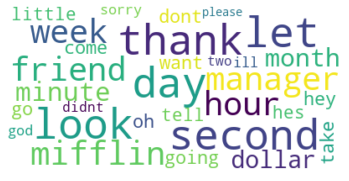

CLUSTER no.1


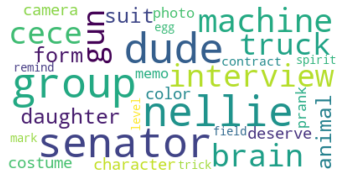

CLUSTER no.2


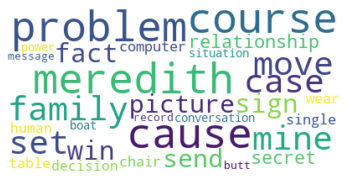

CLUSTER no.3


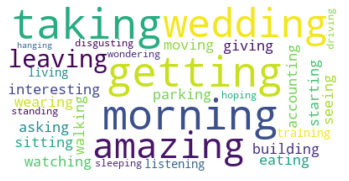

CLUSTER no.4


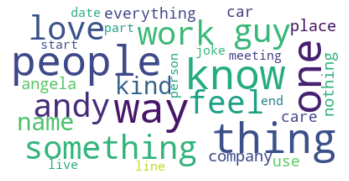

In [66]:
for i in range(0,5):
    word=" ".join(word for word in (df[df['CLUSTERS']==i].words.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


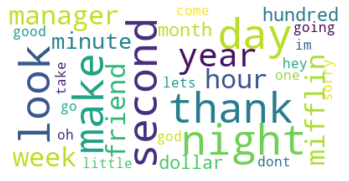

In [293]:
word=" ".join(word for word in (df[df['CLUSTERS']==1].words.values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

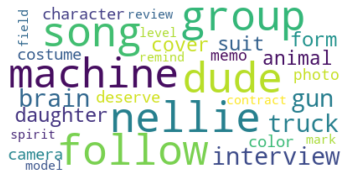

In [294]:
word=" ".join(word for word in (df[df['CLUSTERS']==2].words.values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

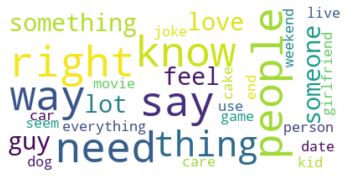

In [295]:
word=" ".join(word for word in (df[df['CLUSTERS']==3].words.values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

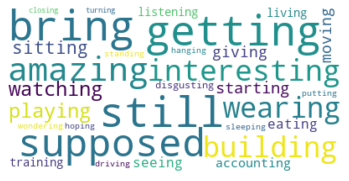

In [296]:
word=" ".join(word for word in (df[df['CLUSTERS']==4].words.values))
WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [171]:
fasttext_word_vec()

{'</s>': array([-1.46273360e-01, -4.09805477e-02, -2.55077243e-01, -6.06007725e-02,
         2.12035999e-01,  1.26815001e-02, -1.94783300e-01, -1.41629986e-02,
         1.08427189e-01,  1.73541024e-01, -5.10341823e-02,  5.41116707e-02,
         1.01608552e-01,  1.24670170e-01, -1.03184789e-01, -4.64254990e-02,
        -8.97234306e-02,  7.96553940e-02,  7.56584778e-02, -2.41320655e-01,
         2.31122263e-02,  5.93318827e-02,  2.23951519e-01, -2.12223902e-01,
         1.57337978e-01, -1.45820007e-01, -2.08499297e-01, -1.13994375e-01,
        -9.06373188e-02,  2.02569619e-01, -1.62243158e-01,  2.38115355e-01,
        -2.52416313e-01,  1.89759694e-02, -1.12197176e-01, -2.55613714e-01,
        -2.36222167e-02, -3.04111958e-01, -3.19105446e-01, -3.94145735e-02,
         1.65412470e-03,  1.18183352e-01,  2.19559181e-04,  7.00427517e-02,
         2.99721006e-02, -1.67459115e-01, -1.42857283e-01, -2.04663128e-01,
        -1.86193079e-01,  1.90423593e-01, -3.95299673e-01,  2.05321252e-01,
    

In [92]:
model.get_word_vector('keep')

array([ 0.01801215,  0.15509361,  0.03628848, -0.1376891 ,  0.14121197,
       -0.04089191, -0.4184913 , -0.11520302,  0.06558277,  0.25265038,
        0.04359957,  0.21558955,  0.11939567,  0.14056116, -0.10306391,
        0.19354814, -0.29028216, -0.04393741, -0.01115574, -0.25845343,
       -0.07236908, -0.03584183,  0.00289426, -0.23721819,  0.04144041,
       -0.16306786, -0.17151383, -0.20432556,  0.08682897,  0.11786406,
       -0.07204926,  0.290657  , -0.35061815, -0.00408446, -0.10204022,
       -0.27078333, -0.1047613 , -0.3365838 , -0.11185391,  0.09615337,
       -0.03711579,  0.1466366 ,  0.10484232, -0.04164211,  0.12989858,
       -0.14821137,  0.21051848, -0.16491574, -0.05502847,  0.19879344,
       -0.4612657 ,  0.18948683, -0.16891114,  0.04214099, -0.24378842,
       -0.10822   ,  0.13100934,  0.21967119, -0.02402415,  0.11553273,
        0.03284431,  0.02393109,  0.22572564,  0.09534563, -0.11983737,
        0.33920744, -0.08524498,  0.07999587,  0.16860272,  0.12

In [98]:
model.get_subwords('guess')

(['guess',
  '<gu',
  '<gue',
  '<gues',
  '<guess',
  'gue',
  'gues',
  'guess',
  'guess>',
  'ues',
  'uess',
  'uess>',
  'ess',
  'ess>',
  'ss>'],
 array([    224,  724084, 1991331, 1179396,  156881, 1564229,  250134,
        1650067,  347461,  357269,  643110,  799746, 1015727, 1901233,
         602408]))

In [107]:
for i in get_word_vector:

['</s>',
 'i',
 'you',
 'the',
 'to',
 'a',
 'and',
 'it',
 'that',
 'is',
 'of',
 'no',
 'this',
 'in',
 'what',
 'me',
 'my',
 'have',
 'im',
 'just',
 'we',
 'its',
 'know',
 'so',
 'do',
 'for',
 'not',
 'oh',
 'on',
 'dont',
 'are',
 'be',
 'was',
 'your',
 'like',
 'yeah',
 'all',
 'with',
 'okay',
 'but',
 'well',
 'right',
 'get',
 'here',
 'about',
 'thats',
 'hey',
 'can',
 'go',
 'he',
 'out',
 'think',
 'good',
 'youre',
 'up',
 'at',
 'michael',
 'if',
 'one',
 'going',
 'really',
 'were',
 'want',
 'how',
 'there',
 'yes',
 'would',
 'did',
 'ok',
 'now',
 'gonna',
 'uh',
 'come',
 'dwight',
 'they',
 'got',
 'will',
 'an',
 'am',
 'her',
 'why',
 'see',
 'or',
 'jim',
 'time',
 'from',
 'some',
 'back',
 'him',
 'who',
 'because',
 'she',
 'say',
 'as',
 'need',
 'pam',
 'when',
 'could',
 'great',
 'thank',
 'cant',
 'look',
 'guys',
 'very',
 'people',
 'um',
 'then',
 'take',
 'been',
 'should',
 'little',
 'hes',
 'make',
 'our',
 'lets',
 'mean',
 'tell',
 'us',
 'h

In [205]:
sentence_data = pd.read_csv("MSL.csv")
sentence_data 

msg_lower
0      all right jim your quarterlies look very good ...
1                    oh i told you i couldnt close it so
2      so youve come to the master for guidance is th...
3                actually you called me in here but yeah
4            all right well let me show you how its done
...                                                  ...
54156  it all seems so very arbitrary i applied for a...
54157  i just feel lucky that i got a chance to share...
54158  im happy that this was all filmed so i can rem...
54159  i sold paper at this company for 12 years my j...
54160  i thought it was weird when you picked us to m...

[54161 rows x 1 columns]

In [259]:
data.msg_lower.replace(np.nan,0, inplace=True)
data.dropna(subset=['msg_lower'], inplace=True)

In [273]:
data.drop(data.index[data['msg_lower'] == 'nan'], inplace = True)

In [274]:
data['msg_lower'] = data['msg_lower'].map(lambda x: x.lstrip('+-').rstrip('nan'))

In [320]:
data['msg_len'] = data['msg_lower'].apply(lambda x: len(x.split()))

In [324]:
data = data[data['msg_len'] > 0]

In [330]:
data[data['msg_len'] == 'nan']

Empty DataFrame
Columns: [season, episode, title, scene, speaker, line, clean_msg, msg_lower, msg_tokenied, no_stopwords, msg_stemmed, msg_lemmatized, msg_len]
Index: []

In [332]:
data['msg_lower'] = data['msg_lower'].apply(lambda x: str(x))

/tmp/ipykernel_9117/1833821065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['msg_lower'] = data['msg_lower'].apply(lambda x: str(x))


In [344]:
def fasttext_sentence_vec(data,column):
    ft_sentence_dict={}
    for sentence in data[column]:
        if type(sentence) != <class 'float'>:
            print(type(sentence))
            ft_sentence_dict[sentence]=model.get_sentence_vector(sentence)

    return ft_sentence_dict



fasttext_sentence_vec(sentence_data, column='msg_lower')

SyntaxError: invalid syntax (2193125055.py, line 4)

In [337]:
type(3.2)

float

In [115]:
M_S = model.get_sentence_vector('MSL')
M_S

array([-0.18040238,  0.04042165, -0.10602808,  0.19932409,  0.09854076,
       -0.15542307,  0.00305765,  0.03932832, -0.07513554, -0.01699179,
       -0.05600567,  0.1294539 , -0.05014466, -0.07304742,  0.02196247,
       -0.15080388,  0.11529388,  0.08507857, -0.15978205,  0.00195292,
       -0.06415394, -0.02344265,  0.11682156,  0.02258779,  0.15590656,
        0.02682289,  0.13166133,  0.05830958,  0.01747058, -0.08632702,
        0.03566686,  0.3076306 , -0.03610317, -0.00177289, -0.08868995,
        0.00069578, -0.18293892, -0.01643408,  0.14345421, -0.11858214,
       -0.15932225,  0.10040983, -0.00094366,  0.02476585,  0.07584073,
       -0.17618196,  0.07217167,  0.05937218,  0.09164951,  0.0711705 ,
        0.07096943, -0.00317135, -0.03521824, -0.12259378,  0.02244081,
        0.00114485,  0.06731778, -0.19410114,  0.12407146, -0.04563566,
       -0.11477412, -0.086411  , -0.05518183,  0.13668038, -0.10093357,
       -0.09094279, -0.11144396, -0.03781506, -0.16677955, -0.06

In [124]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(M_S.iloc[:, 1:])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [125]:
wcss = []
for i in range(1, 55, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(M_S)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

ValueError: Expected 2D array, got 1D array instead:
array=[-0.18040238  0.04042165 -0.10602808  0.19932409  0.09854076 -0.15542307
  0.00305765  0.03932832 -0.07513554 -0.01699179 -0.05600567  0.1294539
 -0.05014466 -0.07304742  0.02196247 -0.15080388  0.11529388  0.08507857
 -0.15978205  0.00195292 -0.06415394 -0.02344265  0.11682156  0.02258779
  0.15590656  0.02682289  0.13166133  0.05830958  0.01747058 -0.08632702
  0.03566686  0.3076306  -0.03610317 -0.00177289 -0.08868995  0.00069578
 -0.18293892 -0.01643408  0.14345421 -0.11858214 -0.15932225  0.10040983
 -0.00094366  0.02476585  0.07584073 -0.17618196  0.07217167  0.05937218
  0.09164951  0.0711705   0.07096943 -0.00317135 -0.03521824 -0.12259378
  0.02244081  0.00114485  0.06731778 -0.19410114  0.12407146 -0.04563566
 -0.11477412 -0.086411   -0.05518183  0.13668038 -0.10093357 -0.09094279
 -0.11144396 -0.03781506 -0.16677955 -0.06007185 -0.02116056 -0.03042754
 -0.0665007  -0.04970475  0.11247969 -0.11809906  0.11694604 -0.09005678
  0.1560919   0.0472502  -0.09872935 -0.16638806 -0.07747788  0.06691393
  0.01978746  0.07335602  0.08158182 -0.14418502  0.08423886 -0.06594414
 -0.13117447  0.04178634  0.06911147  0.06044825  0.02256682 -0.02656146
 -0.07231604 -0.03308665 -0.03615448 -0.18955033].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.